In [1]:
import pandas_datareader as pdr
import tiingo
import pandas as pd

In [2]:
import os

os.environ["TIINGO_API_KEY"] = "88c24674ff891fec4bf56a2aacdc106086bff05f"


In [3]:
from tiingo import TiingoClient

config = {
    'api_key': '88c24674ff891fec4bf56a2aacdc106086bff05f'
}

client = TiingoClient(config)


In [4]:
import pandas_datareader as pdr

api_key= '88c24674ff891fec4bf56a2aacdc106086bff05f'
ds = pdr.get_data_tiingo('AAPL', api_key=api_key)


C:\Users\rumit\AppData\Local\Temp\ipykernel_2144\1081325122.py:4: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  ds = pdr.get_data_tiingo('AAPL', api_key=api_key)


In [5]:
ds.to_csv('AAPL.csv')

In [6]:
ds=pd.read_csv('AAPL.csv')
ds.head()

symbol                       date   close    high     low    open    volume  \
0   AAPL  2018-08-31 00:00:00+00:00  227.63  228.87  226.00  226.51  43340134   
1   AAPL  2018-09-04 00:00:00+00:00  228.36  229.18  226.63  228.41  27390132   
2   AAPL  2018-09-05 00:00:00+00:00  226.87  229.67  225.10  228.99  33332960   
3   AAPL  2018-09-06 00:00:00+00:00  223.10  227.35  221.30  226.23  34289976   
4   AAPL  2018-09-07 00:00:00+00:00  221.30  225.37  220.71  221.85  37619810   

    adjClose    adjHigh     adjLow    adjOpen  adjVolume  divCash  splitFactor  
0  54.498229  54.795104  54.107981  54.230083  173360536      0.0          1.0  
1  54.673002  54.869323  54.258813  54.684973  109560528      0.0          1.0  
2  54.316273  54.986637  53.892507  54.823834  133331840      0.0          1.0  
3  53.413675  54.431192  52.982726  54.163047  137159904      0.0          1.0  
4  52.982726  53.957149  52.841471  53.114405  150479240      0.0          1.0

In [7]:
ds.tail()

symbol                       date   close     high      low     open  \
1251   AAPL  2023-08-23 00:00:00+00:00  181.12  181.550  178.325  178.520   
1252   AAPL  2023-08-24 00:00:00+00:00  176.38  181.104  176.010  180.674   
1253   AAPL  2023-08-25 00:00:00+00:00  178.61  179.150  175.820  177.380   
1254   AAPL  2023-08-28 00:00:00+00:00  180.19  180.590  178.545  180.090   
1255   AAPL  2023-08-29 00:00:00+00:00  184.12  184.900  179.500  179.695   

        volume  adjClose  adjHigh   adjLow  adjOpen  adjVolume  divCash  \
1251  52722752    181.12  181.550  178.325  178.520   52722752      0.0   
1252  54945798    176.38  181.104  176.010  180.674   54945798      0.0   
1253  51449594    178.61  179.150  175.820  177.380   51449594      0.0   
1254  43820697    180.19  180.590  178.545  180.090   43820697      0.0   
1255  53003948    184.12  184.900  179.500  179.695   53003948      0.0   

      splitFactor  
1251          1.0  
1252          1.0  
1253          1.0  
1254          1.0  
1255          1.0

In [50]:
#taking 'volume' attribute to predict the price
ds2=ds.reset_index()['close']

In [51]:
ds2.shape  #1256 records are there

(1256,)

In [52]:
ds2

0       227.63
1       228.36
2       226.87
3       223.10
4       221.30
         ...  
1251    181.12
1252    176.38
1253    178.61
1254    180.19
1255    184.12
Name: close, Length: 1256, dtype: float64

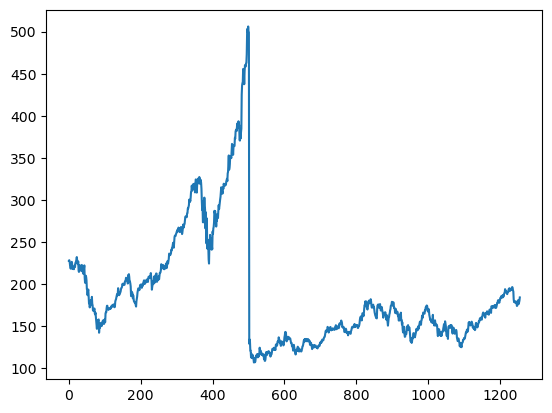

In [53]:
import matplotlib.pyplot as plt
plt.plot(ds2)

In [54]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

#scaler=MinMaxScaler(feature_range=(0.1))
#ds2=scaler.fit_transform(np.array(ds2).reshape(-1,1))

In [55]:
#as LSTM are sensitive, here MinMax scaler has been applied

ds2 = np.array(ds2).reshape(-1, 1)  

# specifying the feature_range parameter as a tuple (0.1, 1.0)
scaler = MinMaxScaler(feature_range=(0.1, 1.0))
ds2_scaled = scaler.fit_transform(np.array(ds2).reshape(-1,1))

In [56]:
ds2.shape

(1256, 1)

In [57]:
ds2

array([[227.63],
       [228.36],
       [226.87],
       ...,
       [178.61],
       [180.19],
       [184.12]])

In [58]:
#splitting dataset into train & test
training_size = int(len(ds2)*0.70) #70% will be our training data
test_size = len(ds2)-training_size  #the rest will be test data
training_data,test_data = ds2[0:training_size,:],ds2[training_size:len(ds2),:1]


In [59]:
training_size   

879

In [60]:
test_size 

377

In [61]:
len(training_data),len(test_data)

(879, 377)

In [62]:
#preprocessing the data
#creating a function for test and train datasets

def create_dataset(data, time_step):
    dataX, dataY=[],[]
    for i in range(len(data)-time_step-1):
        x= data[i:i+time_step, 0]  # i=0,1,2,3....99
        dataX.append(x)
        dataY.append(data[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [63]:
#reshaping x=[time, time+1, time+2....time+99] and y=time+100
 
time_step=100
x_train, y_train= create_dataset(training_data,time_step)
x_test, y_test= create_dataset(test_data, time_step)


In [64]:
x_train.shape , y_train.shape

((778, 100), (778,))

In [65]:
x_test.shape , y_test.shape

((276, 100), (276,))

In [66]:
#reshaping train & test data for LSTM

x_train= x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_test= x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [67]:
#creating stacked LSTM model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [68]:
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add (LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [69]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [70]:
#fitting the model

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
13/13 [==============================] - 9s 232ms/step - loss: 47485.0273 - val_loss: 24860.3066
Epoch 2/100
13/13 [==============================] - 2s 127ms/step - loss: 45968.1016 - val_loss: 23856.9121
Epoch 3/100
13/13 [==============================] - 2s 130ms/step - loss: 44841.6211 - val_loss: 23136.9648
Epoch 4/100
13/13 [==============================] - 2s 132ms/step - loss: 44119.6719 - val_loss: 22753.3828
Epoch 5/100
13/13 [==============================] - 2s 132ms/step - loss: 43704.6562 - val_loss: 22477.9492
Epoch 6/100
13/13 [==============================] - 2s 137ms/step - loss: 43370.2070 - val_loss: 22233.2715
Epoch 7/100
13/13 [==============================] - 2s 141ms/step - loss: 43064.1211 - val_loss: 22003.5117
Epoch 8/100
13/13 [==============================] - 2s 140ms/step - loss: 42772.7930 - val_loss: 21780.5957
Epoch 9/100
13/13 [==============================] - 2s 140ms/step - loss: 42485.7656 - val_loss: 21564.2754
Epoch 10/100
13/13 

In [71]:
#prediction

train_predict= model.predict(x_train)
test_predict= model.predict(x_test)

9/9 [==============================] - 0s 29ms/step


In [72]:
train_predict.shape, test_predict.shape

((778, 1), (276, 1))

In [73]:
#taking back to original form

train_predict= scaler.inverse_transform(train_predict)
test_predict= scaler.inverse_transform(test_predict)

In [74]:
import math
from sklearn.metrics import mean_squared_error

In [75]:
#calculating reduced mean squared error preformance metrics

math.sqrt(mean_squared_error(y_train, train_predict))

31363.09588341024

In [76]:
math.sqrt(mean_squared_error(y_test, test_predict))

31405.306441227855

In [77]:
#shifting train predictions for plotting
time_step=100
train_predict_plot= np.empty_like(ds2)
train_predict_plot = np.empty_like(ds2, dtype=float)
train_predict_plot[:,:]= np.nan
train_predict_plot[time_step:len(train_predict) + time_step,:]= train_predict

#shifting train predictions for plotting
test_predict_plot= np.empty_like(ds2)
test_predict_plot = np.empty_like(ds2, dtype=float)
test_predict_plot[:,:]= np.nan
test_predict_plot[len(train_predict)+ (time_step*2) + 1:len(ds2)-1, :]= test_predict

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


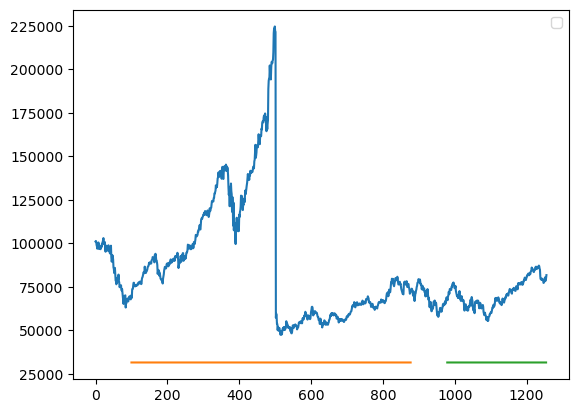

In [78]:
#plotting actual data and predictions

plt.plot(scaler.inverse_transform(ds2))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.legend()
plt.show()

In [79]:
len(test_data) #for previous day's data


377

In [80]:
x_input=test_data[277:].reshape(1,-1)  #taking 277 to 377 days for predicting the next day
x_input.shape

(1, 100)

In [81]:
temp=list(x_input)
temp=temp[0].tolist()

In [82]:
temp

[164.66,
 162.03,
 160.8,
 160.1,
 165.56,
 165.21,
 165.23,
 166.47,
 167.63,
 166.65,
 165.02,
 165.33,
 163.77,
 163.76,
 168.41,
 169.68,
 169.59,
 168.54,
 167.45,
 165.79,
 173.57,
 173.5,
 171.77,
 173.555,
 173.75,
 172.57,
 172.07,
 172.07,
 172.69,
 175.05,
 175.16,
 174.2,
 171.56,
 171.84,
 172.99,
 175.43,
 177.3,
 177.25,
 180.09,
 180.95,
 179.58,
 179.21,
 177.82,
 180.57,
 180.96,
 183.79,
 183.31,
 183.95,
 186.01,
 184.92,
 185.01,
 183.96,
 187.0,
 186.68,
 185.27,
 188.06,
 189.25,
 189.59,
 193.97,
 192.46,
 191.33,
 191.81,
 190.68,
 188.61,
 188.08,
 189.77,
 190.54,
 190.69,
 193.99,
 193.73,
 195.1,
 193.13,
 191.94,
 192.75,
 193.62,
 194.5,
 193.22,
 195.83,
 196.45,
 195.605,
 192.58,
 191.17,
 181.99,
 178.85,
 179.8,
 178.19,
 177.97,
 177.79,
 179.46,
 177.45,
 176.57,
 174.0,
 174.49,
 175.84,
 177.23,
 181.12,
 176.38,
 178.61,
 180.19,
 184.12]

In [84]:
#logic to predict the next 30 days

from numpy import array

list_op = []
steps = 100
i = 0

while i < 30:  # Predicting the output for 30 days
    if len(temp) > steps:
        x_input = np.array(temp[-steps:])  # Take the last 'steps' elements
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape(1, steps, 1)
        y_cap = model.predict(x_input, verbose=0)
        print("{} day's input {}".format(i, y_cap))
        temp.extend(y_cap[0].tolist())
        temp = temp[1:]  # Remove the first element to maintain the sliding window
        list_op.extend(y_cap.tolist())
    else:
        x_input = np.array(temp)
        x_input = x_input.reshape((1, steps, 1))
        y_cap = model.predict(x_input, verbose=0)
        print(y_cap[0])
        temp.extend(y_cap[0].tolist())
        print(len(temp))
        list_op.extend(y_cap.tolist())
        i = i + 1

print(list_op)


0 day input [71.01517487 71.01517487 71.01517487 71.01517487 71.01517487 71.01517487
 71.01517487 71.01517487 71.01517487 71.01517487 71.01517487 71.01517487
 71.01517487 71.01517487 71.01517487 71.01517487 71.01517487 71.01517487
 71.01517487 71.01517487 71.01517487 71.01517487 71.01517487 71.01517487
 71.01517487 71.01517487 71.01517487 71.01517487 71.01517487 71.01517487
 71.01517487 71.01517487 71.01517487 71.01517487 71.01517487 71.01517487
 71.01517487 71.01517487 71.01517487 71.01517487 71.01517487 71.01517487
 71.01517487 71.01517487 71.01517487 71.01517487 71.01517487 71.01517487
 71.01517487 71.01517487 71.01517487 71.01517487 71.01517487 71.01517487
 71.01517487 71.01517487 71.01517487 71.01517487 71.01517487 71.01517487
 71.01517487 71.01517487 71.01517487 71.01517487 71.01517487 71.01517487
 71.01517487 71.01517487 71.01517487 71.01517487 71.01517487 71.01517487
 71.01517487 71.01517487 71.01517487 71.01517487 71.01517487 71.01517487
 71.01517487 71.01517487 71.01517487 71

In [42]:
day_new= np.arange(1,101)
day_pred= np.arange(101,131)  # 30 day's output

In [43]:
import matplotlib.pylab as plt

In [44]:
len(ds2)

1256

In [45]:
ds3= ds2.tolist()
ds3.extend(list_op)

ValueError: x and y must have same first dimension, but have shapes (30,) and (44, 1)

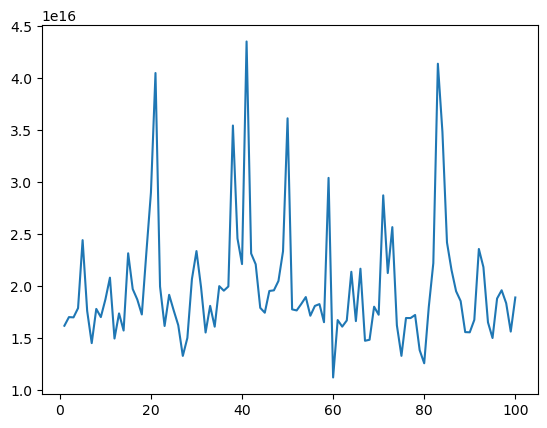

In [47]:
plt.plot(day_new, scaler.inverse_transform(ds2[1156:]))
plt.plot(day_pred, scaler.inverse_transform(list_op))

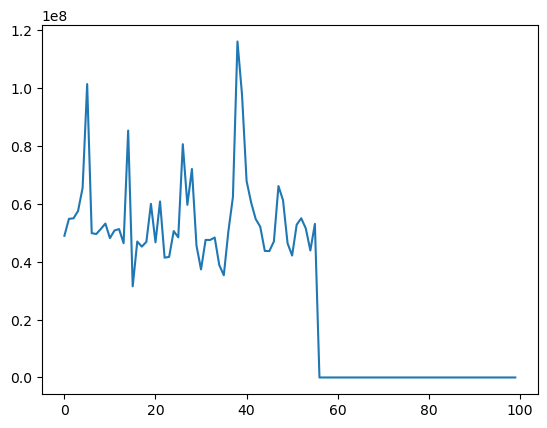

In [49]:
ds3=ds2.tolist()
ds3.extend(list_op)
plt.plot(ds3[1200:])